In [28]:
pip install petpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
#Set Dependencies
import pandas as pd
import numpy as np
import csv
import petpy
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [30]:
#Import CSV
merged_csv = "/users/rebeccatast/desktop/Animal-Adoptions/resources/merged_data.csv"

#Read CSV
SA_Shelter = pd.read_csv(merged_csv)

In [31]:
SA_Shelter.head()

,id.1,organization_id,age,gender,size,coat,tags,name_x,description,status,...,colors.primary,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.postcode,animal_id,organization_id.1,name_y
0,49799665,TX1818,Baby,Female,Medium,NaN,[],gd Nyx,You can fill out an adoption application onlin...,adopted,...,NaN,True,False,False,False,Pipe Creek,78063,49799665,TX1818,A Doggie 4 You
1,49799666,TX1818,Adult,Male,Small,NaN,[],Rogue,You can fill out an adoption application onlin...,adopted,...,NaN,True,True,False,False,Pipe Creek,78063,49799666,TX1818,A Doggie 4 You
2,49798311,TX1818,Young,Male,Small,NaN,[],Todd,You can fill out an adoption application onlin...,adopted,...,NaN,True,True,False,True,Pipe Creek,78063,49798311,TX1818,A Doggie 4 You
3,49798148,TX1818,Young,Male,Small,NaN,[],O'Ryan,You can fill out an adoption application onlin...,adopted,...,NaN,True,False,False,False,Pipe Creek,78063,49798148,TX1818,A Doggie 4 You
4,49794961,TX1207,Young,Female,Medium,NaN,[],Sophia,** This dog is in a foster home in San Antonio...,adopted,...,NaN,True,False,False,True,Helotes,78023,49794961,TX1207,San Antonio Great Dane Rescue


In [32]:
#Total Number of Dogs
total_dogs = len(SA_Shelter["animal_id"].unique())
print(total_dogs)


7478


In [33]:
#Check for duplicates
SA_Shelter = SA_Shelter.drop_duplicates(subset=["animal_id"], keep ="last")
print(len(SA_Shelter))

7478


In [34]:
#Total Shelters in Sample
total_shelters = len(SA_Shelter["organization_id"].unique())

print(total_shelters)

123


In [35]:
#Sort All Shelter Information by Gender
true_mf1 = SA_Shelter.loc[:, "gender"]
true_mf2 = true_mf1.value_counts()
true_mf2

Male      3748
Female    3730
Name: gender, dtype: int64

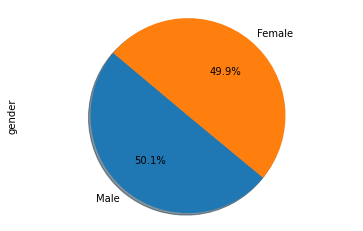

In [36]:
#Pie Chart Using Pandas for All Shelter Information by Gender
true_mf2.plot(kind="pie",shadow = True, startangle=140,figsize=(6,4), autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [37]:
#Gender by status
group_gender = SA_Shelter.groupby(["status","gender"]).size()
print(group_gender)

status     gender
adoptable  Female     725
           Male       929
adopted    Female    3005
           Male      2819
dtype: int64


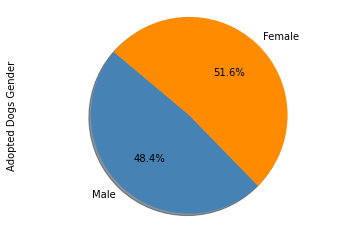

In [38]:
#Pie Chart Using Pyplot Gender Adopted
Gender = ["Male", "Female"]
numbers = [2819,3005]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Adopted Dogs Gender")
plt.pie(numbers, explode=explode, labels= Gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

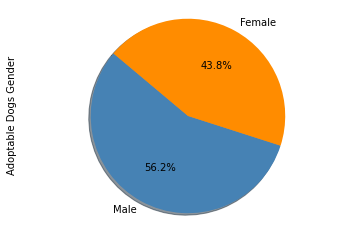

In [39]:
#Pie Chart Using Pyplot Gender Adoptable
Gender = ["Male", "Female"]
numbers = [929,725]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Adoptable Dogs Gender")
plt.pie(numbers, explode=explode, labels= Gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [40]:
#Dataframe grouping by the Breed Column
dog_breeds = SA_Shelter.groupby("breeds.primary")

# Count the number of data points for each primary breed
dog_breeds_count = pd.DataFrame(dog_breeds["breeds.primary"].count())

print(dog_breeds_count)


                           breeds.primary
breeds.primary                           
Affenpinscher                           4
Afghan Hound                            1
Airedale Terrier                       11
Akbash                                  2
Akita                                   7
...                                   ...
Wire Fox Terrier                        3
Wirehaired Dachshund                    3
Wirehaired Terrier                     23
Yellow Labrador Retriever              17
Yorkshire Terrier                      48

[165 rows x 1 columns]


In [41]:
dog_breeds_count.max()

breeds.primary    815
dtype: int64

In [42]:
#Create a dataframe grouping by adoption status
dogs_status = SA_Shelter.groupby("status")

dogs_status_count = pd.DataFrame(dogs_status["status"].size())

print(dogs_status_count)



           status
status           
adoptable    1654
adopted      5824


In [43]:
#Group by breed
breed_count =SA_Shelter.groupby(["status","breeds.primary"]).size()                      

print(breed_count)

status     breeds.primary           
adoptable  Affenpinscher                 3
           Akita                         4
           Alaskan Malamute              1
           American Bulldog             24
           American Bully                2
                                        ..
adopted    Wire Fox Terrier              1
           Wirehaired Dachshund          3
           Wirehaired Terrier           19
           Yellow Labrador Retriever    11
           Yorkshire Terrier            44
Length: 255, dtype: int64


In [44]:
#CSV Output for Breed Types by Status
output_data_file_breed_count ="/users/rebeccatast/desktop/Animal-Adoptions/breed_counts.csv"
breed_count.to_csv(output_data_file_breed_count, index_label="breeds.primary")

In [45]:
#Top 5 Breeds for Adopted and Adoptable
top_five_breeds = breed_count.sort_values(by = ["id.1","status"], ascending =[False, False])
top_five_breeds.head(25)

TypeError: sort_values() got an unexpected keyword argument 'by'

In [46]:
# Count of Spayed vs Neutered
fixed_status = SA_Shelter.groupby("attributes.spayed_neutered")

fixed_status_count = pd.DataFrame(fixed_status["attributes.spayed_neutered"].count())

print(fixed_status_count)

                            attributes.spayed_neutered
attributes.spayed_neutered                            
False                                             1620
True                                              5858


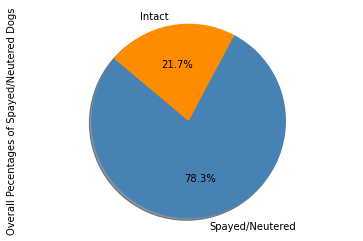

In [47]:
#Pie Chart Using Pyplot Fixed Overall
Spayed_Neutered = ["Spayed/Neutered", "Intact"]
numbers = [5858,1620]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Overall Pecentages of Spayed/Neutered Dogs")
plt.pie(numbers, explode=explode, labels=Spayed_Neutered, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [48]:
#Fixed by Status
group_fixed = SA_Shelter.groupby(["status","attributes.spayed_neutered"]).size()
print(group_fixed)

status     attributes.spayed_neutered
adoptable  False                          489
           True                          1165
adopted    False                         1131
           True                          4693
dtype: int64


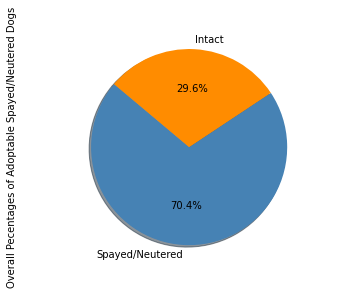

In [49]:
#Pie Chart Using Pyplot Fixed Adoptable
Spayed_Neutered = ["Spayed/Neutered", "Intact"]
numbers = [1165,489]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Overall Pecentages of Adoptable Spayed/Neutered Dogs")
plt.pie(numbers, explode=explode, labels=Spayed_Neutered, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

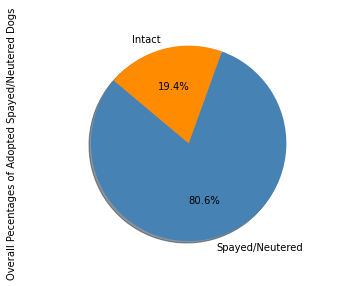

In [50]:
#Pie Chart Using Pyplot Fixed Adopted

Spayed_Neutered = ["Spayed/Neutered", "Intact"]
numbers = [4693,1131]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Overall Pecentages of Adopted Spayed/Neutered Dogs")
plt.pie(numbers, explode=explode, labels=Spayed_Neutered, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

In [51]:
#Age Overall
SA_Shelter.groupby("age").size()  

age
Adult     2902
Baby      2140
Senior     402
Young     2034
dtype: int64

In [52]:
#Age overall DataFrame
dog_age = pd.DataFrame( {"Number":[2140, 2034, 2902, 402]},
         index=["Baby", "Young", "Adult", "Senior"]
)
dog_age.head()

,Number
Baby,2140
Young,2034
Adult,2902
Senior,402


Text(0, 0.5, 'Number of Dogs')

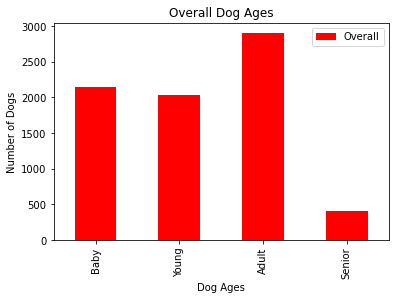

In [53]:
#Bar graph of overall age data
plotdata = pd.DataFrame({
    "Overall":[2140, 2034, 2902, 402],
    },  
    index=["Baby", "Young", "Adult", "Senior"]
)
plotdata.plot(kind="bar", color="red")
plt.title("Overall Dog Ages")
plt.xlabel("Dog Ages")
plt.ylabel("Number of Dogs")

In [54]:
#Age by Status
group_age = SA_Shelter.groupby(["age","status"]).size()
print(group_age)

age     status   
Adult   adoptable     899
        adopted      2003
Baby    adoptable     150
        adopted      1990
Senior  adoptable     140
        adopted       262
Young   adoptable     465
        adopted      1569
dtype: int64


In [55]:
#Age by Status Bar Graphs
status_age = pd.DataFrame({
    "Adoptable":[150, 465, 899, 140],
    "Adopted":[1990, 1569, 2003, 262]
    }, 
    index=["Baby", "Young", "Adult", "Senior"]
)
status_age.head()

,Adoptable,Adopted
Baby,150,1990
Young,465,1569
Adult,899,2003
Senior,140,262


Text(0, 0.5, 'Number of Dogs')

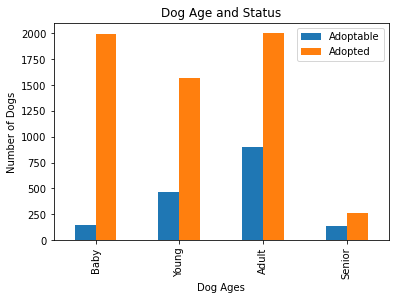

In [56]:
plotdata = pd.DataFrame({
    "Adoptable":[150, 465, 899, 140],
    "Adopted":[1990, 1569, 2003, 262]
    },  
    index=["Baby", "Young", "Adult", "Senior"]
)
plotdata.plot(kind="bar")
plt.title("Dog Age and Status")
plt.xlabel("Dog Ages")
plt.ylabel("Number of Dogs")

In [57]:
#Size Overall
SA_Shelter.groupby("size").size()


size
Extra Large     113
Large          1320
Medium         3742
Small          2303
dtype: int64

In [58]:
#Sort All Shelter Information by Dog Size
true_mf1 = SA_Shelter.loc[:, "size"]
true_mf2 = true_mf1.value_counts()
true_mf2

Medium         3742
Small          2303
Large          1320
Extra Large     113
Name: size, dtype: int64

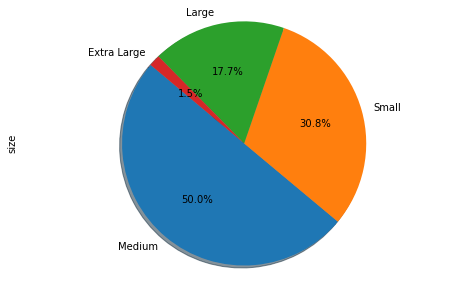

In [59]:
#Pie Chart Using Pandas for All Shelter Information by Size
true_mf2.plot(kind="pie",shadow = True, startangle=140,figsize=(8,5), autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [60]:
#Dog Size Dataframe
dog_size = pd.DataFrame({
    "Overall":[113, 1320, 3742, 2303],
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
dog_size.head()

,Overall
Extra Large,113
Large,1320
Medium,3742
Small,2303


Text(0, 0.5, 'Number of Dogs')

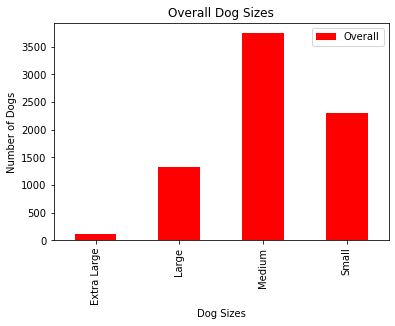

In [61]:
plotdata = pd.DataFrame({
    "Overall":[113, 1320, 3742, 2303],
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
plotdata.plot(kind="bar", color ="red")
plt.title("Overall Dog Sizes")
plt.xlabel("Dog Sizes")
plt.ylabel("Number of Dogs")

In [62]:
#Size by Status
group_size_status = SA_Shelter.groupby(["size", "status"]).size()
print(group_size_status)

size         status   
Extra Large  adoptable      26
             adopted        87
Large        adoptable     405
             adopted       915
Medium       adoptable     852
             adopted      2890
Small        adoptable     371
             adopted      1932
dtype: int64


In [63]:
status_size = pd.DataFrame({
    "Adoptable":[26, 405, 852, 371],
    "Adopted":[87, 915, 2890, 1932]
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
status_size.head()

,Adoptable,Adopted
Extra Large,26,87
Large,405,915
Medium,852,2890
Small,371,1932


Text(0, 0.5, 'Number of Dogs')

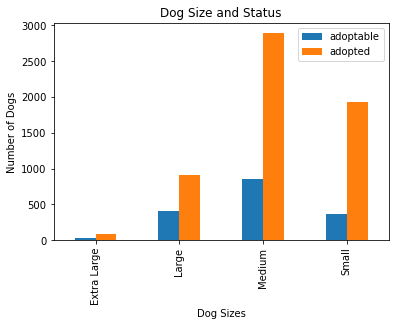

In [64]:
plotdata = pd.DataFrame({
    "adoptable":[26, 405, 852, 371],
    "adopted":[87, 915, 2890, 1932]
    }, 
    index=["Extra Large", "Large", "Medium", "Small"]
)
plotdata.plot(kind="bar")
plt.title("Dog Size and Status")
plt.xlabel("Dog Sizes")
plt.ylabel("Number of Dogs")